In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [202]:
plt.rcParams["font.family"] = 'Malgun Gothic'

In [294]:
train = pd.read_csv("t.train.csv")
test  = pd.read_csv("t.test.csv")

In [295]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [298]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [299]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

EDA

In [301]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [302]:
def stack_plot(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked= True, figsize = (10,5))

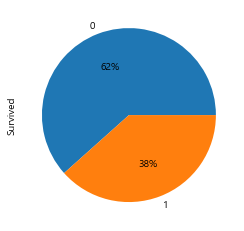

In [303]:
train['Survived'].value_counts().plot.pie(autopct='%.f%%')

([<matplotlib.patches.Wedge at 0x1931761fe88>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'dead')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

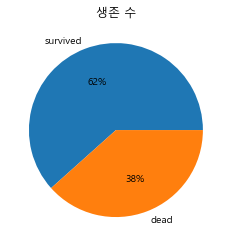

In [304]:
lable = ['survived','dead']
plt.title('생존 수')

plt.pie(train['Survived'].value_counts(),labels= lable,autopct='%.f%%')

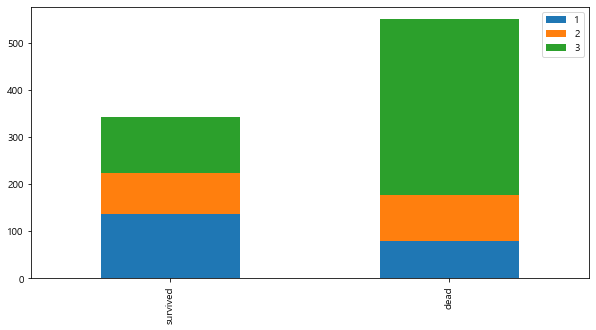

In [305]:
stack_plot('Pclass')

Sex

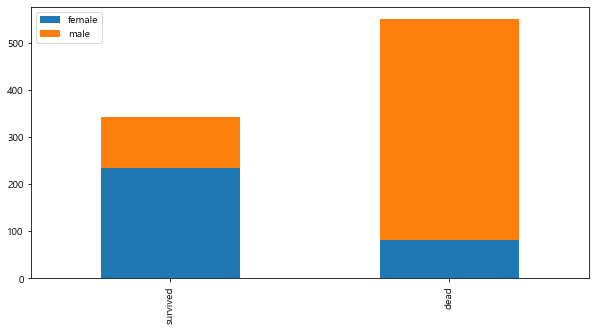

In [306]:
stack_plot('Sex')

In [307]:
train['Sex'] = train['Sex'].map({"male":0, "female":1})
test['Sex'] = test['Sex'].map({"male":0, "female":1})

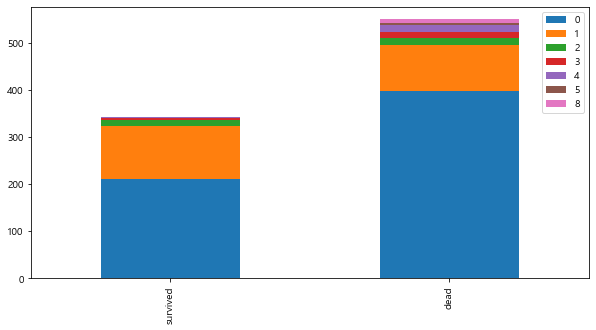

In [308]:
stack_plot('SibSp')

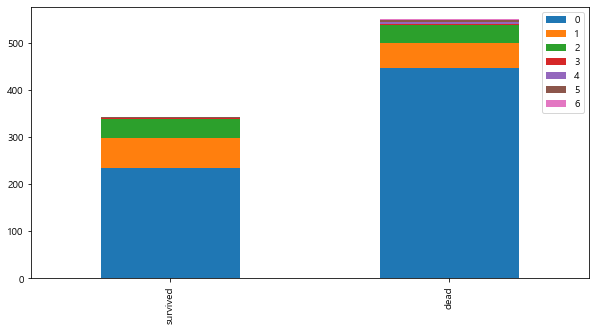

In [309]:
stack_plot('Parch')

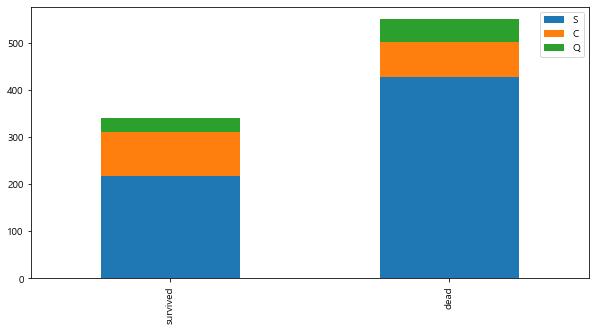

In [310]:
stack_plot('Embarked')

In [311]:
train['Ticket'].value_counts()

347082       7
1601         7
CA. 2343     7
CA 2144      6
3101295      6
            ..
S.P. 3464    1
350029       1
372622       1
6563         1
113784       1
Name: Ticket, Length: 681, dtype: int64

In [312]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [313]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
              ..
D15            1
D47            1
C86            1
C99            1
B86            1
Name: Cabin, Length: 147, dtype: int64

Name

In [314]:
train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#정규 표현식

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [315]:
train['Name'].value_counts()

Vande Walle, Mr. Nestor Cyriel                       1
O'Leary, Miss. Hanora "Norah"                        1
Glynn, Miss. Mary Agatha                             1
Vanden Steen, Mr. Leo Peter                          1
Gustafsson, Mr. Johan Birger                         1
                                                    ..
Johnson, Mr. Alfred                                  1
Mockler, Miss. Helen Mary "Ellie"                    1
Newell, Miss. Marjorie                               1
Thorneycroft, Mrs. Percival (Florence Kate White)    1
Petranec, Miss. Matilda                              1
Name: Name, Length: 891, dtype: int64

#Mr - 남자
#Mrs. 결혼한 기혼 여자
#Miss. 결혼하지 않은 미혼 여자
#Ms. 여자일경우

In [316]:
train['New_name']  = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['New_name']  = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [317]:
train ['New_name'] =  train['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})
test['New_name'] =  test['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})

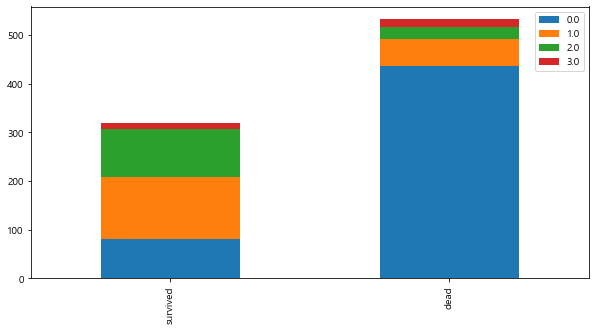

In [318]:
stack_plot('New_name')

In [319]:
train['New_name'] = train['New_name'].fillna('0')
test['New_name'] = test['New_name'].fillna('0')

In [320]:
train = train.astype({'New_name':'float'})

#Mr - 남자
#Mrs. 결혼한 기혼 여자
#Miss. 결혼하지 않은 미혼 여자
#Ms.여자일경우

Age

In [321]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [322]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [323]:
train.loc[train['Age'] <= 20,'Age'] = 0
train.loc[(train['Age'] > 20) & (train['Age'] <=40), 'Age'] = 1
train.loc[(train['Age'] > 40) & (train['Age'] <=60), 'Age'] = 2
train.loc[(train['Age'] > 60), 'Age'] = 4

In [324]:
test.loc[train['Age'] <= 20,'Age'] = 0
test.loc[(train['Age'] > 20) & (test['Age'] <=40), 'Age'] = 1
test.loc[(train['Age'] > 40) & (test['Age'] <=60), 'Age'] = 2
test.loc[(train['Age'] > 60), 'Age'] = 4

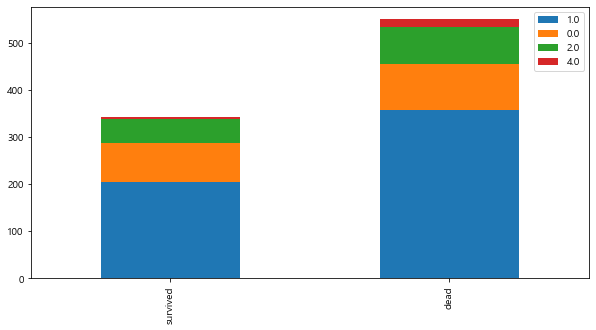

In [325]:
stack_plot('Age')

In [326]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
New_name         0
dtype: int64

In [327]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Embarked

In [328]:
p1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
p2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
p3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

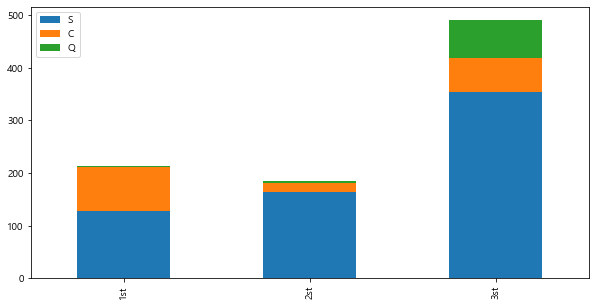

In [329]:
df1 = pd.DataFrame([p1,p2,p3])
df1.index= ['1st', '2st', '3st']
df1.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [330]:
train['Embarked'] = train['Embarked'].fillna('S')

In [331]:
test['Embarked'] = test['Embarked'].fillna('S')

In [332]:
train['Embarked'] = train['Embarked'].map({"S":0,"C":1,"Q":2})

In [333]:
test['Embarked'] = test['Embarked'].map({"S":0,"C":1,"Q":2})

Fare

In [334]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

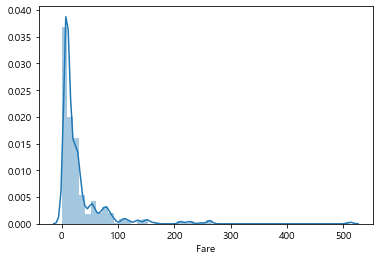

In [335]:
sns.distplot(train['Fare'])

#정규규분포가 아닌 매우 비대칭 분포 

In [336]:
train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i >0 else 0)
test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i >0 else 0)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


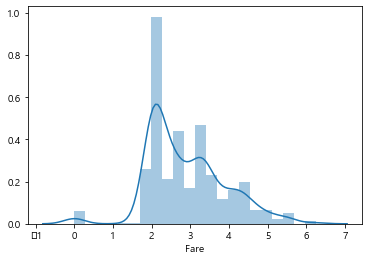

In [337]:
sns.distplot(train['Fare'])

cabin

In [338]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
              ..
D15            1
D47            1
C86            1
C99            1
B86            1
Name: Cabin, Length: 147, dtype: int64

In [339]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

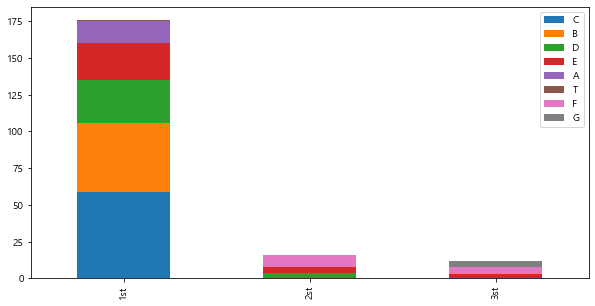

In [340]:
C1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
C2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
C3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df2 = pd.DataFrame([C1,C2,C3])
df2.index= ['1st', '2st', '3st']
df2.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [341]:
train['Cabin'] = train['Cabin'].map({"A":0, "B":1, "C":2,"D":3,"F":4,"G":5,"T":6})
test['Cabin'] = test['Cabin'].map({"A":0, "B":1, "C":2,"D":3,"F":4,"G":5,"T":6})

In [342]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"),inplace = True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform("median"),inplace = True)

In [343]:
train.groupby("Pclass")

In [344]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
New_name       0
dtype: int64

In [345]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
New_name       0
dtype: int64

Modeling

In [346]:
train = train.drop(['Name','Ticket'],axis = 1)

In [347]:
test = test.drop(['Name','Ticket'], axis = 1)

In [348]:
x = train.iloc[:,2:13]
y = train['Survived']
new_test = test.iloc[:,1:13]

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 123)   

In [264]:
from sklearn.model_selection import cross_val_score

In [265]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [266]:
m1_xgb = XGBClassifier()
acc_xgb = np.mean(cross_val_score(m1_xgb, x_train, y_train,scoring='accuracy',cv = 5))
acc_xgb

0.8019600118191669

In [267]:
m2_lgb = LGBMClassifier()
acc_lgb = np.mean(cross_val_score(m2_lgb, x_train, y_train, scoring='accuracy',cv = 5))
acc_lgb

0.7893627499261303

In [268]:
m3_knn = KNeighborsClassifier()
acc_knn = np.mean(cross_val_score(m3_knn, x_train, y_train, scoring='accuracy',cv = 5 ))
acc_knn

0.7810105387570176

In [269]:
m4_rf = RandomForestClassifier()
acc_rf = np.mean(cross_val_score(m4_rf,x_train, y_train, scoring='accuracy',cv =5 ))
acc_rf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

0.7879444499162809

In [270]:
m5_gbc = GradientBoostingClassifier()
acc_gbc = np.mean(cross_val_score(m5_gbc,x_train,y_train,scoring='accuracy',cv=5))
acc_gbc

0.8033783118290161

In [271]:
m6_dt = DecisionTreeClassifier()
acc_dt = np.mean(cross_val_score(m6_dt,x_train,y_train,scoring='accuracy',cv = 5))
acc_dt

0.7865163006008077

In [272]:
m7_log = LogisticRegression()
acc_log = np.mean(cross_val_score(m7_log,x_train,y_train,scoring='accuracy',cv = 5))
acc_log

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.7879739978331527

In [273]:
m8_svc = SVC()
acc_svc = np.mean(cross_val_score(m8_svc,x_train,y_train,scoring='accuracy',cv = 5))
acc_svc

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

0.7949473062149119

In [281]:
m1_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [274]:
m5_gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [284]:
features_xgb = m1_xgb.feature_importances_
sort_xgb = np.argsort(features_xgb)
sort_xgb

array([8, 5, 4, 2, 3, 7, 6, 0, 1], dtype=int64)

([<matplotlib.axis.YTick at 0x1931a02b6c8>,
 <a list of 9 Text yticklabel objects>)

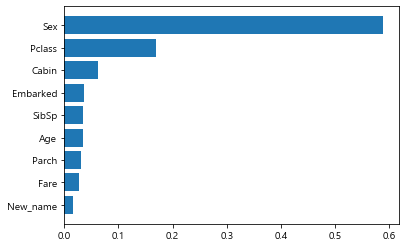

In [286]:
plt.barh(range(len(sort_xgb)), features_xgb[sort_xgb])
plt.yticks(range(len(sort_xgb)),x_train.columns[sort_xgb])

In [276]:
features = m5_gbc.feature_importances_
features

array([0.126791  , 0.50107496, 0.05131441, 0.02673077, 0.03865356,
       0.18498517, 0.04820301, 0.01606559, 0.00618152])

In [71]:
sort_ind = np.argsort(features)
sort_ind

array([8, 7, 3, 4, 6, 2, 0, 5, 1], dtype=int64)

([<matplotlib.axis.YTick at 0x1930f8e2f88>,
 <a list of 9 Text yticklabel objects>)

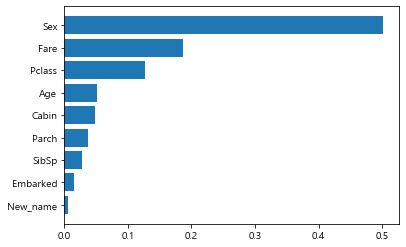

In [72]:
plt.barh(range(len(sort_ind)), features[sort_ind])
plt.yticks(range(len(sort_ind)),x_train.columns[sort_ind])

최적화하기

In [73]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [75]:
param_gbc = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000]}]

In [76]:
pipe_gbc = make_pipeline(StandardScaler(),
                    PCA(n_components = 2),
                    GridSearchCV(GradientBoostingClassifier(), param_gbc,cv=kfold))

In [77]:
gs = pipe_gbc.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [78]:
pipe_gbc.named_steps['pca'].components_

array([[-0.48544822,  0.30552893,  0.13470913,  0.13738195,  0.20869354,
         0.51422287, -0.45281791,  0.02661506,  0.3467581 ],
       [ 0.34148876,  0.43494544, -0.36928471,  0.37527966,  0.40941519,
        -0.02673645,  0.35692816,  0.04095911,  0.34581915]])

In [79]:
gs.score(x_test,y_test)

0.7877094972067039

XGB

In [80]:
param_xgb = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}]

In [81]:
pipe_xgb = make_pipeline(StandardScaler(),
                    PCA(n_components = 2),
                    GridSearchCV(XGBClassifier(), param_xgb,cv=kfold))

In [82]:
gs_xgb = pipe_xgb.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
gs_xgb.score(x_test,y_test)

0.8212290502793296

RF

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
param_rf = [{'max_depth': [3,5,8,10],
              'n_estimators': [50, 100, 200, 500, 1000]}]

In [86]:
pipe_rf = make_pipeline(StandardScaler(),
                    PCA(n_components = 2),
                    GridSearchCV(RandomForestClassifier(), param_rf,cv=kfold))

In [87]:
gs_rf = pipe_rf.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [88]:
gs_rf.score(x_test, y_test)

0.8100558659217877

제출

In [352]:
pred = gs_xgb.predict(new_test)

In [353]:
submission = pd.DataFrame({
    "PassengerId" :test["PassengerId"],
    "Survived": pred
})

In [363]:
submission.to_csv('submission.csv',index=False)

In [364]:
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
